In [5]:
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot


In [40]:
model = xgb.Booster()
model.load_model('models/model_data.json')

In [21]:
df = pd.read_feather('processed/train/ready/reviews_from_00000000_to_00121914.feather')

In [168]:
df

,game__review__count,game__review__mean,game__years__Pre-1900,game__years__1901-1980,game__years__1981-1990,game__years__1991-2000,game__years__2001-2010,game__years__2011-2015,game__years__Post-2016,game__min_age__none,...,mean__mechanic__hand_management,mean__mechanic__hexagon_grid,mean__mechanic__modular_board,mean__mechanic__roll___spin_and_move,mean__mechanic__set_collection,mean__mechanic__simulation,mean__mechanic__simultaneous_action_selection,mean__mechanic__tile_placement,mean__mechanic__variable_player_powers,rating
0,9.0,6.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.0,-1.0,8.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,8.0
1,45.0,6.066667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.0,-1.0,8.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,7.0
2,0.0,7.057729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,-1.0,-1.0,-1.0,5.0,-1.0,5.0,-1.0,10.0,7.0
3,30.0,6.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,-1.0,-1.0,-1.0,5.0,-1.0,5.0,-1.0,10.0,10.0
4,0.0,7.057729,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,-1.0,-1.0,-1.0,5.0,-1.0,5.0,-1.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121909,36.0,5.802083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.5,8.0,7.0,-1.0,7.0,-1.0,7.0,-1.0,7.5,7.0
121910,0.0,7.057729,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,7.5,8.0,7.0,-1.0,7.0,-1.0,7.0,-1.0,7.5,7.0
121911,21.0,7.414286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.5,8.0,7.0,-1.0,7.0,-1.0,7.0,-1.0,7.5,8.0
121912,3.0,7.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,8.0


In [130]:
f_score = model.get_fscore()
f_score = dict([ (df.columns[ int(key.replace('f', '')) ], int(value)) for key, value in f_score.items() ])
f_score = pd.Series(f_score).sort_values(ascending=False)

In [161]:
df_f_score = f_score.to_frame().reset_index()
df_f_score['cat'] = df_f_score['index'].str.split('__').str[0:-1].str.join('__')
df_f_score = df_f_score.rename({0: 'power'}, axis=1)

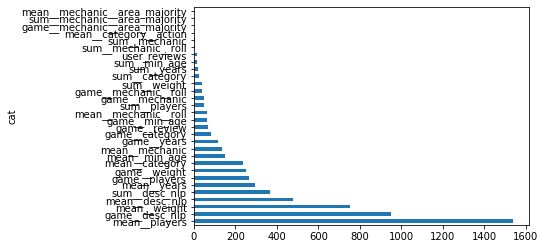

In [167]:
df_f_score.groupby('cat').sum()['power'].sort_values(ascending=False).plot.barh()

In [170]:
f_score['game__review__mean']

19